# Goals
- [x] Make a model that based on data can estimate the house price  
- [ ] Make a model that see how house data affects house price during drops and how long it takes to recover


## Clean Data
- [x] drop unneeded data
- [x] Remove bd and ba
- [x] convert type to value
- [x] drop land type homes
- [x] Maybe drop all that don't have a lot value? (problem that will remove ~30% of all data) or impute data by taking average of lot size depending on bed/bath/sqft? 
- [x] Convert all lot acrs to sqft and remove "sqft"
- [x] convert year built to only number
- [x] Convert price K, M ,etc to real numbers
- [x] Impute all condos lot size values to its sqft since the listed lot size is "inaccurate". We can assume any condo/townhouse has a small yard and thus its lot size = sqft

In [53]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import glob
import seaborn as sns

In [2]:
# Combine all the seperate csv files
allFiles = glob.glob("../data/*.csv")
allFiles

['../data/92103.csv',
 '../data/92117.csv',
 '../data/92101.csv',
 '../data/92071.csv',
 '../data/92111.csv',
 '../data/92104.csv',
 '../data/92064.csv',
 '../data/92011.csv',
 '../data/92009.csv',
 '../data/92037.csv',
 '../data/92024.csv',
 '../data/92130.csv',
 '../data/92124.csv',
 '../data/92126.csv']

In [3]:
pd.options.display.max_columns = 30


In [4]:
combinedDF = pd.DataFrame()

columns = ["url", "streetAddress", "city", "state", "zip", "neighborhood", "lat", "long", "bed", "bath", "sq_ft", "type", "lotSize", "yearBuilt", "eventDate", "eventType", "eventPrice", "hoaPrice", "hoaCurrency", "hoaPeriod", "stories"]

for file in allFiles: 
    df = pd.read_csv(file, names=columns)
    combinedDF = combinedDF.append(df, ignore_index=True)

combinedDF.head(10)
# combinedDF.to_csv("foo.csv")

,url,streetAddress,city,state,zip,neighborhood,lat,long,bed,bath,sq_ft,type,lotSize,yearBuilt,eventDate,eventType,eventPrice,hoaPrice,hoaCurrency,hoaPeriod,stories
0,https://www.trulia.com/p/ca/san-diego/4121-ran...,4121 Randolph St,San Diego,CA,92103,Mission Hills,32.752209,-117.176568,5bd,4ba,2999.0,single-family home,5000 sqft,Built in 1950,11/05/2010,Sold,$854K,NaN,NaN,NaN,NaN
1,https://www.trulia.com/p/ca/san-diego/4121-ran...,4121 Randolph St,San Diego,CA,92103,Mission Hills,32.752209,-117.176568,5bd,4ba,2999.0,single-family home,5000 sqft,Built in 1950,10/14/2003,Sold,$899K,NaN,NaN,NaN,NaN
2,https://www.trulia.com/p/ca/san-diego/4121-ran...,4121 Randolph St,San Diego,CA,92103,Mission Hills,32.752209,-117.176568,5bd,4ba,2999.0,single-family home,5000 sqft,Built in 1950,04/15/2003,Sold,$764K,NaN,NaN,NaN,NaN
3,https://www.trulia.com/p/ca/san-diego/4215-9th...,4215 9th Ave,San Diego,CA,92103,University Heights,32.754809,-117.156642,3bd,3ba,2241.0,single-family home,NaN,Built in 1981,09/30/2002,Sold,$490K,NaN,NaN,NaN,NaN
4,https://www.trulia.com/p/ca/san-diego/632-w-ma...,632 W Maple St,San Diego,CA,92103,Park West,32.732220,-117.169152,2bd,2ba,1304.0,single-family home,5131 sqft,Built in 1990,08/21/2014,Sold,$612K,NaN,NaN,NaN,NaN
5,https://www.trulia.com/p/ca/san-diego/632-w-ma...,632 W Maple St,San Diego,CA,92103,Park West,32.732220,-117.169152,2bd,2ba,1304.0,single-family home,5131 sqft,Built in 1990,03/12/2009,Sold,$450K,NaN,NaN,NaN,NaN
6,https://www.trulia.com/p/ca/san-diego/303-upas...,303 Upas St,San Diego,CA,92103,Park West,32.740478,-117.161890,2bd,2ba,1701.0,condo,NaN,Built in 2016,08/15/2017,Sold,$1.02M,NaN,NaN,NaN,NaN
7,https://www.trulia.com/p/ca/san-diego/230-w-wa...,230 W Walnut Ave,San Diego,CA,92103,Hillcrest,32.741696,-117.165742,8bd,8ba,5288.0,multi-family,NaN,Built in 1970,09/29/1994,Sold,$475K,NaN,NaN,NaN,NaN
8,https://www.trulia.com/p/ca/san-diego/1433-put...,1433 Puterbaugh St,San Diego,CA,92103,Midtown,32.743344,-117.176568,NaN,NaN,2583.0,farm/ranch,8794 sqft,Built in 1950,01/24/2020,Sold,$2.6M,NaN,NaN,NaN,2.0
9,https://www.trulia.com/p/ca/san-diego/1433-put...,1433 Puterbaugh St,San Diego,CA,92103,Midtown,32.743344,-117.176568,NaN,NaN,2583.0,farm/ranch,8794 sqft,Built in 1950,11/01/2016,Sold,$2.5M,NaN,NaN,NaN,2.0


In [5]:
combinedDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1925 entries, 0 to 1924
Data columns (total 21 columns):
url              1925 non-null object
streetAddress    1925 non-null object
city             1925 non-null object
state            1925 non-null object
zip              1925 non-null int64
neighborhood     1490 non-null object
lat              1925 non-null float64
long             1925 non-null float64
bed              1863 non-null object
bath             1874 non-null object
sq_ft            1910 non-null float64
type             1925 non-null object
lotSize          1295 non-null object
yearBuilt        1905 non-null object
eventDate        1925 non-null object
eventType        1925 non-null object
eventPrice       1925 non-null object
hoaPrice         0 non-null float64
hoaCurrency      0 non-null float64
hoaPeriod        0 non-null float64
stories          258 non-null float64
dtypes: float64(7), int64(1), object(13)
memory usage: 315.9+ KB


In [6]:
combinedDF.describe()

,zip,lat,long,sq_ft,hoaPrice,hoaCurrency,hoaPeriod,stories
count,1925.000000,1925.000000,1925.000000,1910.000000,0.0,0.0,0.0,258.000000
mean,92078.188052,32.895131,-117.166925,2225.879581,NaN,NaN,NaN,1.635659
std,43.050205,0.133152,0.086720,2521.967818,NaN,NaN,NaN,0.564004
min,92009.000000,32.706031,-117.351951,388.000000,NaN,NaN,NaN,1.000000
25%,92037.000000,32.775895,-117.236694,1264.000000,NaN,NaN,NaN,1.000000
50%,92101.000000,32.854450,-117.168371,1810.500000,NaN,NaN,NaN,2.000000
75%,92111.000000,33.026362,-117.123062,2673.000000,NaN,NaN,NaN,2.000000
max,92130.000000,33.157164,-116.947034,88000.000000,NaN,NaN,NaN,3.000000


In [7]:
combinedDF.isna().sum()

url                 0
streetAddress       0
city                0
state               0
zip                 0
neighborhood      435
lat                 0
long                0
bed                62
bath               51
sq_ft              15
type                0
lotSize           630
yearBuilt          20
eventDate           0
eventType           0
eventPrice          0
hoaPrice         1925
hoaCurrency      1925
hoaPeriod        1925
stories          1667
dtype: int64

In [8]:
combinedDF = combinedDF.dropna(subset=["bed", "bath", "yearBuilt"])
combinedDF.isna().sum()

url                 0
streetAddress       0
city                0
state               0
zip                 0
neighborhood      419
lat                 0
long                0
bed                 0
bath                0
sq_ft               0
type                0
lotSize           591
yearBuilt           0
eventDate           0
eventType           0
eventPrice          0
hoaPrice         1856
hoaCurrency      1856
hoaPeriod        1856
stories          1600
dtype: int64

In [9]:
# Remove bd and ba from bed and bath
combinedDF["bed"] = combinedDF.bed.map(lambda x: float(x.replace("bd", '')))
combinedDF["bath"] = combinedDF.bath.map(lambda x: float(x.replace("ba", '')))
combinedDF.head()

,url,streetAddress,city,state,zip,neighborhood,lat,long,bed,bath,sq_ft,type,lotSize,yearBuilt,eventDate,eventType,eventPrice,hoaPrice,hoaCurrency,hoaPeriod,stories
0,https://www.trulia.com/p/ca/san-diego/4121-ran...,4121 Randolph St,San Diego,CA,92103,Mission Hills,32.752209,-117.176568,5.0,4.0,2999.0,single-family home,5000 sqft,Built in 1950,11/05/2010,Sold,$854K,NaN,NaN,NaN,NaN
1,https://www.trulia.com/p/ca/san-diego/4121-ran...,4121 Randolph St,San Diego,CA,92103,Mission Hills,32.752209,-117.176568,5.0,4.0,2999.0,single-family home,5000 sqft,Built in 1950,10/14/2003,Sold,$899K,NaN,NaN,NaN,NaN
2,https://www.trulia.com/p/ca/san-diego/4121-ran...,4121 Randolph St,San Diego,CA,92103,Mission Hills,32.752209,-117.176568,5.0,4.0,2999.0,single-family home,5000 sqft,Built in 1950,04/15/2003,Sold,$764K,NaN,NaN,NaN,NaN
3,https://www.trulia.com/p/ca/san-diego/4215-9th...,4215 9th Ave,San Diego,CA,92103,University Heights,32.754809,-117.156642,3.0,3.0,2241.0,single-family home,NaN,Built in 1981,09/30/2002,Sold,$490K,NaN,NaN,NaN,NaN
4,https://www.trulia.com/p/ca/san-diego/632-w-ma...,632 W Maple St,San Diego,CA,92103,Park West,32.732220,-117.169152,2.0,2.0,1304.0,single-family home,5131 sqft,Built in 1990,08/21/2014,Sold,$612K,NaN,NaN,NaN,NaN


In [10]:
# Convert type to some value and drop all except condo or single home
combinedDF.type.value_counts()

single-family home    1315
condo                  477
multi-family            63
farm/ranch               1
Name: type, dtype: int64

In [11]:
mask = (combinedDF.type != "multi-family") & (combinedDF.type != "farm/ranch")
combinedDF = combinedDF[mask]
combinedDF.type.value_counts()

single-family home    1315
condo                  477
Name: type, dtype: int64

In [12]:
combinedDF.type = combinedDF.type.map({"single-family home" : 0, "condo": 1})

In [13]:
# Clean year built
combinedDF["yearBuilt"] = combinedDF.yearBuilt.map(lambda x: x.replace("Built in", ''))
combinedDF.head()

,url,streetAddress,city,state,zip,neighborhood,lat,long,bed,bath,sq_ft,type,lotSize,yearBuilt,eventDate,eventType,eventPrice,hoaPrice,hoaCurrency,hoaPeriod,stories
0,https://www.trulia.com/p/ca/san-diego/4121-ran...,4121 Randolph St,San Diego,CA,92103,Mission Hills,32.752209,-117.176568,5.0,4.0,2999.0,0,5000 sqft,1950,11/05/2010,Sold,$854K,NaN,NaN,NaN,NaN
1,https://www.trulia.com/p/ca/san-diego/4121-ran...,4121 Randolph St,San Diego,CA,92103,Mission Hills,32.752209,-117.176568,5.0,4.0,2999.0,0,5000 sqft,1950,10/14/2003,Sold,$899K,NaN,NaN,NaN,NaN
2,https://www.trulia.com/p/ca/san-diego/4121-ran...,4121 Randolph St,San Diego,CA,92103,Mission Hills,32.752209,-117.176568,5.0,4.0,2999.0,0,5000 sqft,1950,04/15/2003,Sold,$764K,NaN,NaN,NaN,NaN
3,https://www.trulia.com/p/ca/san-diego/4215-9th...,4215 9th Ave,San Diego,CA,92103,University Heights,32.754809,-117.156642,3.0,3.0,2241.0,0,NaN,1981,09/30/2002,Sold,$490K,NaN,NaN,NaN,NaN
4,https://www.trulia.com/p/ca/san-diego/632-w-ma...,632 W Maple St,San Diego,CA,92103,Park West,32.732220,-117.169152,2.0,2.0,1304.0,0,5131 sqft,1990,08/21/2014,Sold,$612K,NaN,NaN,NaN,NaN


In [14]:
# Clean price
def cleanPrice(x):
    if "K" in x:
        x = x.replace("K", '')
        x = x.replace("$", '')
        return float(x) * 1000
    elif "M" in x:
        x = x.replace("M", '')
        x = x.replace("$", '')
        return float(x) * 1000000

combinedDF.eventPrice = combinedDF.eventPrice.apply(lambda x: cleanPrice(x))
combinedDF.head()

,url,streetAddress,city,state,zip,neighborhood,lat,long,bed,bath,sq_ft,type,lotSize,yearBuilt,eventDate,eventType,eventPrice,hoaPrice,hoaCurrency,hoaPeriod,stories
0,https://www.trulia.com/p/ca/san-diego/4121-ran...,4121 Randolph St,San Diego,CA,92103,Mission Hills,32.752209,-117.176568,5.0,4.0,2999.0,0,5000 sqft,1950,11/05/2010,Sold,854000.0,NaN,NaN,NaN,NaN
1,https://www.trulia.com/p/ca/san-diego/4121-ran...,4121 Randolph St,San Diego,CA,92103,Mission Hills,32.752209,-117.176568,5.0,4.0,2999.0,0,5000 sqft,1950,10/14/2003,Sold,899000.0,NaN,NaN,NaN,NaN
2,https://www.trulia.com/p/ca/san-diego/4121-ran...,4121 Randolph St,San Diego,CA,92103,Mission Hills,32.752209,-117.176568,5.0,4.0,2999.0,0,5000 sqft,1950,04/15/2003,Sold,764000.0,NaN,NaN,NaN,NaN
3,https://www.trulia.com/p/ca/san-diego/4215-9th...,4215 9th Ave,San Diego,CA,92103,University Heights,32.754809,-117.156642,3.0,3.0,2241.0,0,NaN,1981,09/30/2002,Sold,490000.0,NaN,NaN,NaN,NaN
4,https://www.trulia.com/p/ca/san-diego/632-w-ma...,632 W Maple St,San Diego,CA,92103,Park West,32.732220,-117.169152,2.0,2.0,1304.0,0,5131 sqft,1990,08/21/2014,Sold,612000.0,NaN,NaN,NaN,NaN


In [15]:
# Clean lot size
# Set the condo lot size to sq_ft
# Set as str as next method will convert all lot/sqft to floats
combinedDF.loc[combinedDF.type == 1, "lotSize"] = combinedDF.loc[combinedDF.type == 1, "sq_ft"].astype(str) 

In [16]:
# Drop null values
combinedDF = combinedDF.loc[~combinedDF["lotSize"].isnull(), :]

def acresToFt(x):
    if "acres" in x:
        x = float(x.replace("acres", ''))
        x = x * 43560
    elif "acre" in x:
        x = float(x.replace("acre", ''))
        x = x * 43560
    else:
        x = x.replace("sqft", '')
    return float(x)

combinedDF.lotSize = combinedDF.lotSize.map(lambda x: acresToFt(x))

# Drop the values that hae ridiculous lot sizes
combinedDF = combinedDF[combinedDF.lotSize < 700000]

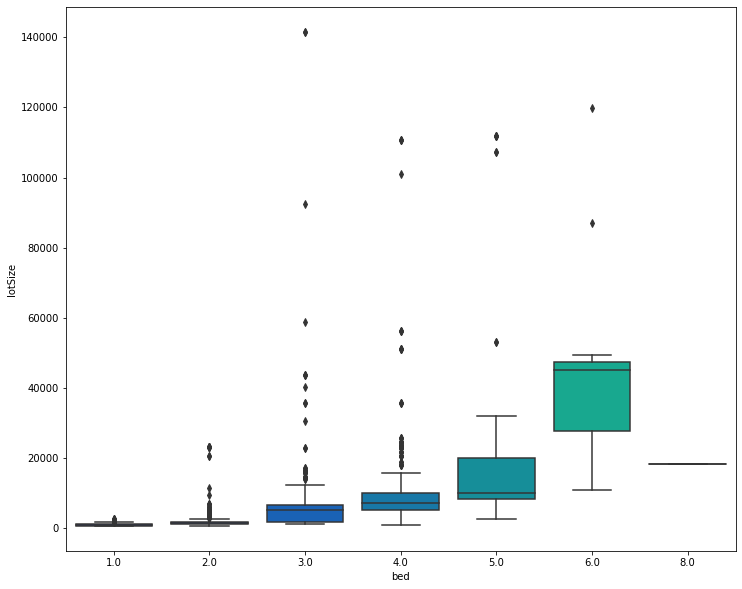

In [17]:
plt.figure(figsize=(12, 10))
sns.boxplot(x='bed',y='lotSize',data=combinedDF,palette='winter')

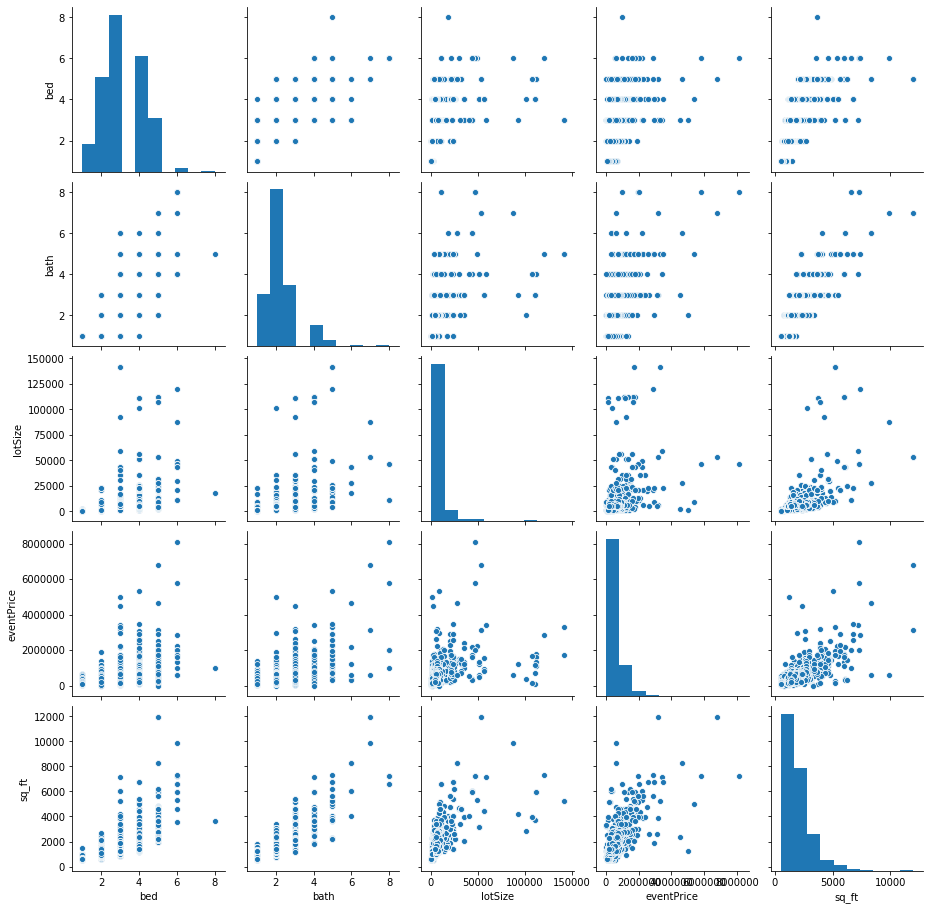

In [18]:
# Graphs kinda shows that the more beds the larger the larger lot size, but not great
# So instead of imputing an "average" lot size into null values. Just going to drop them all.
sns.pairplot(combinedDF,  vars=["bed", "bath", "lotSize", "eventPrice", "sq_ft"])

In [19]:
combinedDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1333 entries, 0 to 1923
Data columns (total 21 columns):
url              1333 non-null object
streetAddress    1333 non-null object
city             1333 non-null object
state            1333 non-null object
zip              1333 non-null int64
neighborhood     1039 non-null object
lat              1333 non-null float64
long             1333 non-null float64
bed              1333 non-null float64
bath             1333 non-null float64
sq_ft            1333 non-null float64
type             1333 non-null int64
lotSize          1333 non-null float64
yearBuilt        1333 non-null object
eventDate        1333 non-null object
eventType        1333 non-null object
eventPrice       1333 non-null float64
hoaPrice         0 non-null float64
hoaCurrency      0 non-null float64
hoaPeriod        0 non-null float64
stories          254 non-null float64
dtypes: float64(11), int64(2), object(8)
memory usage: 269.1+ KB


In [20]:
combinedDF.type.value_counts()

0    856
1    477
Name: type, dtype: int64

In [21]:
combinedDF.head()

,url,streetAddress,city,state,zip,neighborhood,lat,long,bed,bath,sq_ft,type,lotSize,yearBuilt,eventDate,eventType,eventPrice,hoaPrice,hoaCurrency,hoaPeriod,stories
0,https://www.trulia.com/p/ca/san-diego/4121-ran...,4121 Randolph St,San Diego,CA,92103,Mission Hills,32.752209,-117.176568,5.0,4.0,2999.0,0,5000.0,1950,11/05/2010,Sold,854000.0,NaN,NaN,NaN,NaN
1,https://www.trulia.com/p/ca/san-diego/4121-ran...,4121 Randolph St,San Diego,CA,92103,Mission Hills,32.752209,-117.176568,5.0,4.0,2999.0,0,5000.0,1950,10/14/2003,Sold,899000.0,NaN,NaN,NaN,NaN
2,https://www.trulia.com/p/ca/san-diego/4121-ran...,4121 Randolph St,San Diego,CA,92103,Mission Hills,32.752209,-117.176568,5.0,4.0,2999.0,0,5000.0,1950,04/15/2003,Sold,764000.0,NaN,NaN,NaN,NaN
4,https://www.trulia.com/p/ca/san-diego/632-w-ma...,632 W Maple St,San Diego,CA,92103,Park West,32.732220,-117.169152,2.0,2.0,1304.0,0,5131.0,1990,08/21/2014,Sold,612000.0,NaN,NaN,NaN,NaN
5,https://www.trulia.com/p/ca/san-diego/632-w-ma...,632 W Maple St,San Diego,CA,92103,Park West,32.732220,-117.169152,2.0,2.0,1304.0,0,5131.0,1990,03/12/2009,Sold,450000.0,NaN,NaN,NaN,NaN


In [22]:
# Drop unneccesary data
combinedDF = combinedDF.drop(columns=["url", "streetAddress", "city", "state", "neighborhood", "lat", "long", "eventType", "hoaPrice", "hoaCurrency", "hoaPeriod", "stories"])

In [23]:
# Convert date to actual date and add timestamp
combinedDF.eventDate = pd.to_datetime(combinedDF['eventDate'], format='%m/%d/%Y')

In [24]:
from datetime import timezone

combinedDF["eventTimeStamp"] = combinedDF.eventDate.apply(lambda x: x.replace(tzinfo=timezone.utc).timestamp())

In [25]:
combinedDF["month"] = combinedDF.eventDate.dt.month
combinedDF["year"] = combinedDF.eventDate.dt.year
combinedDF["quarter"] = combinedDF.eventDate.dt.quarter

combinedDF["month"] = combinedDF["month"].apply(lambda x: str(x)) 
combinedDF["year"] = combinedDF["year"].apply(lambda x: str(x)) 
combinedDF["quarter"] = combinedDF["quarter"].apply(lambda x: str(x)) 

In [26]:
# Convert zips to categories
combinedDF.zip.value_counts().keys()

Int64Index([92009, 92101, 92104, 92064, 92011, 92071, 92130, 92126, 92103,
            92024, 92037, 92111, 92117, 92124],
           dtype='int64')

In [27]:
mapping = {}

for (i, key) in enumerate(combinedDF.zip.value_counts().keys()):
    mapping[key] = i
    
combinedDF["zipCategory"] = combinedDF.zip.map(mapping)

In [28]:
mapping

{92009: 0,
 92101: 1,
 92104: 2,
 92064: 3,
 92011: 4,
 92071: 5,
 92130: 6,
 92126: 7,
 92103: 8,
 92024: 9,
 92037: 10,
 92111: 11,
 92117: 12,
 92124: 13}

In [29]:
# Add a price/sqft column
combinedDF["price_per_sqft"] = combinedDF.eventPrice / combinedDF.sq_ft

In [30]:
combinedDF.head()

,zip,bed,bath,sq_ft,type,lotSize,yearBuilt,eventDate,eventPrice,eventTimeStamp,month,year,quarter,zipCategory,price_per_sqft
0,92103,5.0,4.0,2999.0,0,5000.0,1950,2010-11-05,854000.0,1.288915e+09,11,2010,4,8,284.761587
1,92103,5.0,4.0,2999.0,0,5000.0,1950,2003-10-14,899000.0,1.066090e+09,10,2003,4,8,299.766589
2,92103,5.0,4.0,2999.0,0,5000.0,1950,2003-04-15,764000.0,1.050365e+09,4,2003,2,8,254.751584
4,92103,2.0,2.0,1304.0,0,5131.0,1990,2014-08-21,612000.0,1.408579e+09,8,2014,3,8,469.325153
5,92103,2.0,2.0,1304.0,0,5131.0,1990,2009-03-12,450000.0,1.236816e+09,3,2009,1,8,345.092025


In [31]:
combinedDF.columns

Index(['zip', 'bed', 'bath', 'sq_ft', 'type', 'lotSize', 'yearBuilt',
       'eventDate', 'eventPrice', 'eventTimeStamp', 'month', 'year', 'quarter',
       'zipCategory', 'price_per_sqft'],
      dtype='object')

## Graph data

/usr/local/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


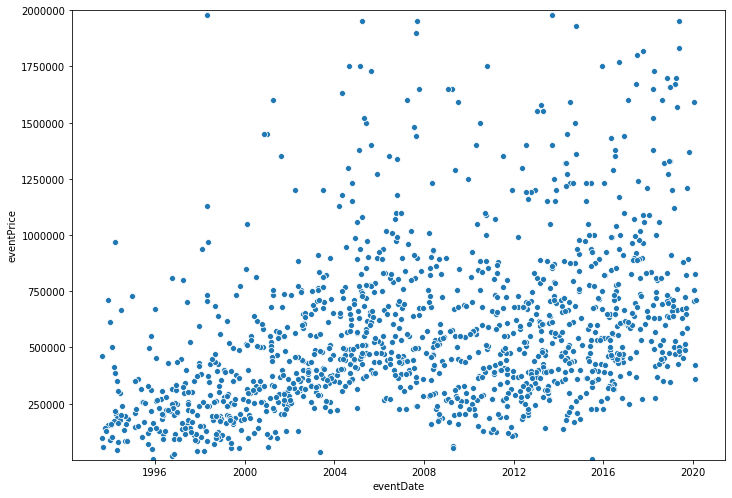

In [32]:
# Look at all the data and price 

a4_dims = (11.7, 8.27)

fig, ax = plt.subplots(figsize=a4_dims)

ax.set(ylim=(20, 2000000))

sns.scatterplot(ax=ax, x="eventDate", y="eventPrice", data=combinedDF)

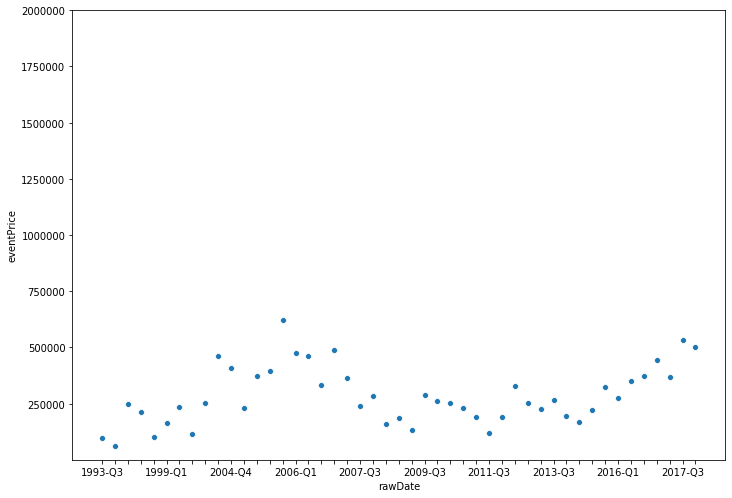

In [33]:
# Group data by quarter and year and number of beds and plot 
group = combinedDF.groupby(["quarter", "year", "bed"])["eventPrice"].mean().reset_index()

group["rawDate"] = group['year'] + '-Q' + group['quarter']

group = group.sort_values('rawDate', ascending=True)

group['date_ordinal'] = pd.to_datetime(group['rawDate']).apply(lambda date: date.toordinal())

a4_dims = (11.7, 8.27)

fig, ax = plt.subplots(figsize=a4_dims)

ax.set(ylim=(20, 2000000))


# ax.set_xlim(group['date_ordinal'].min() - 1000, group['date_ordinal'].max() + 1000)

plot = sns.scatterplot(ax=ax, x="rawDate", y="eventPrice", data=group[(group["bed"] == 1)])
# # sns.regplot(ax=ax, x="date_ordinal", y="eventPrice", data = group[group["bed"] == 1], order=4)
# # group[group["bed"] == 1].plot("rawDate","eventPrice")

for ind, label in enumerate(plot.get_xticklabels()):
    if ind % 5 == 0:
        label.set_visible(True)
    else:
        label.set_visible(False)

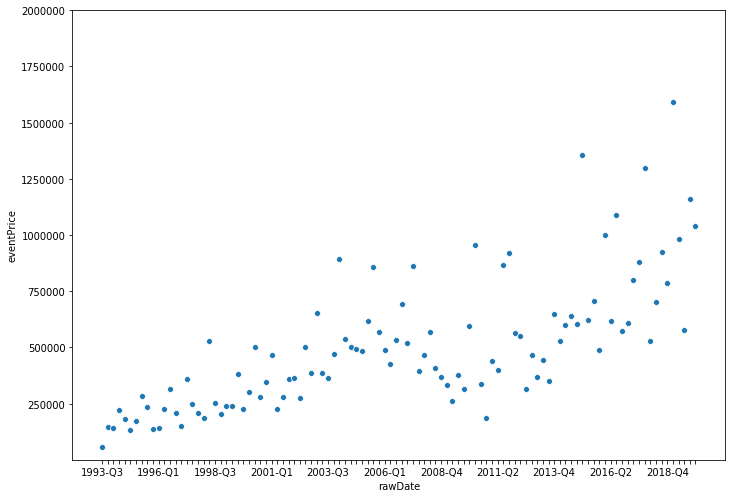

In [34]:
a4_dims = (11.7, 8.27)

fig, ax = plt.subplots(figsize=a4_dims)

ax.set(ylim=(20, 2000000))

# ax.set_xlim(group['date_ordinal'].min() - 1000, group['date_ordinal'].max() + 1000)


plot = sns.scatterplot(ax=ax, x="rawDate", y="eventPrice", data=group[group["bed"] == 3])
# sns.regplot(ax=ax, x="date_ordinal", y="eventPrice", data = group[group["bed"] == 3], order=4)
# group[group["bed"] == 1].plot("rawDate","eventPrice")

for ind, label in enumerate(plot.get_xticklabels()):
    if ind % 10 == 0:
        label.set_visible(True)
    else:
        label.set_visible(False)

There seems like there is a faster recover time with larger bedrooms during the 2008 recession. One bedrooms appeared to not have recoved in price as of 2017 whereas 3br was around peak price in 2014-2015.

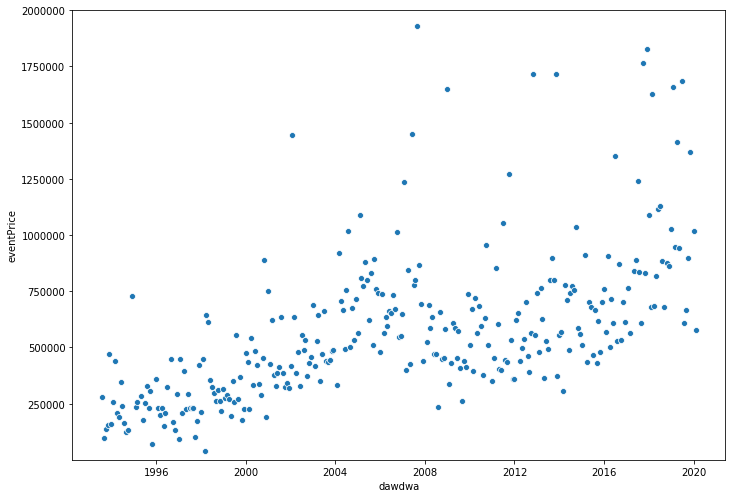

In [35]:
# Extra code

df = combinedDF

df["month"] = df.eventDate.dt.month
df["year"] = df.eventDate.dt.year
df["quarter"] = df.eventDate.dt.quarter

foo = df.groupby(['month', "year"])["eventPrice"].mean().reset_index()
foo.head()


# 
foo["month"] = foo["month"].apply(lambda x: str(x)) 
foo["year"] = foo["year"].apply(lambda x: str(x)) 
foo.head()

foo["rawDate"] = foo['month'] + '-' + foo['year']

foo.head()

foo["dawdwa"] = pd.to_datetime(foo['rawDate'], format='%m-%Y')

foo = foo.sort_values('dawdwa', ascending=True)

a4_dims = (11.7, 8.27)

fig, ax = plt.subplots(figsize=a4_dims)

ax.set(ylim=(20, 2000000))

sns.scatterplot(ax=ax, x="dawdwa", y="eventPrice", data=foo)

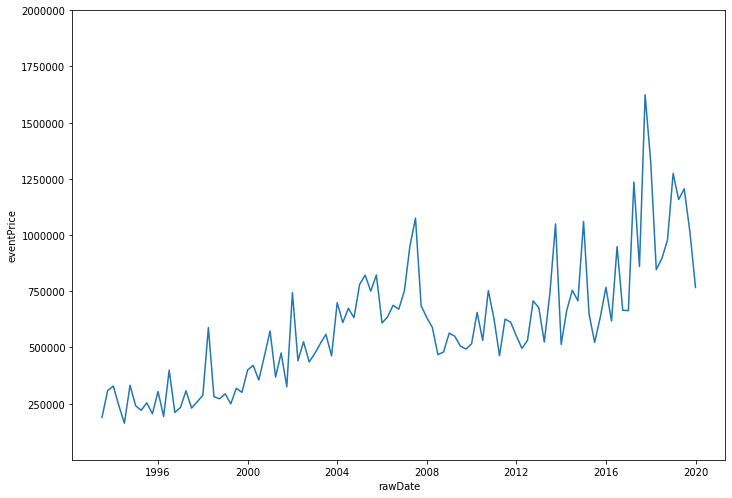

In [36]:
# Extra code
foo = df.groupby(['quarter', "year"])["eventPrice"].mean().reset_index()

foo["quarter"] = foo["quarter"].apply(lambda x: str(x)) 
foo["year"] = foo["year"].apply(lambda x: str(x)) 


foo["rawDate"] = foo['year'] + '-Q' + foo['quarter']

foo.sort_values("rawDate")

foo["rawDate"] = pd.to_datetime(foo['rawDate'])

a4_dims = (11.7, 8.27)

fig, ax = plt.subplots(figsize=a4_dims)

ax.set(ylim=(20, 2000000))

sns.lineplot(ax=ax, x="rawDate", y="eventPrice", data=foo)

# sns.scatterplot(ax=ax, x="rawDate", y="eventPrice", data=foo)

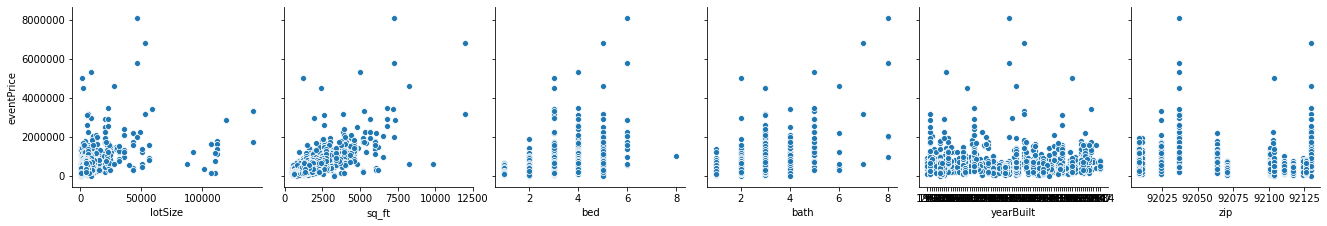

In [37]:
# Look at each variable compared against price
sns.pairplot(data=combinedDF, 
             y_vars=["eventPrice"], 
             x_vars=["lotSize", "sq_ft", "bed", "bath", "yearBuilt", "zip"], 
             height = 3)

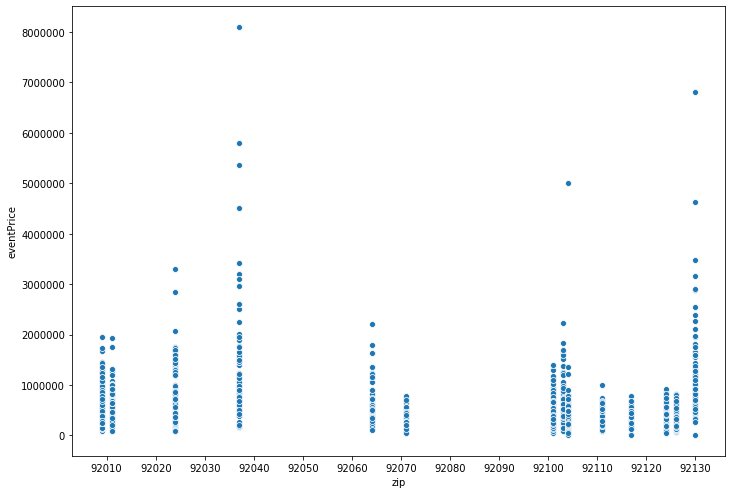

In [38]:
import matplotlib.ticker as ticker
a4_dims = (11.7, 8.27)

fig, ax = plt.subplots(figsize=a4_dims)

# ax.set(ylim=(20, 2000000))

ax.xaxis.set_major_locator(ticker.MultipleLocator(10))

sns.scatterplot(ax=ax, x="zip", y="eventPrice", data=combinedDF)

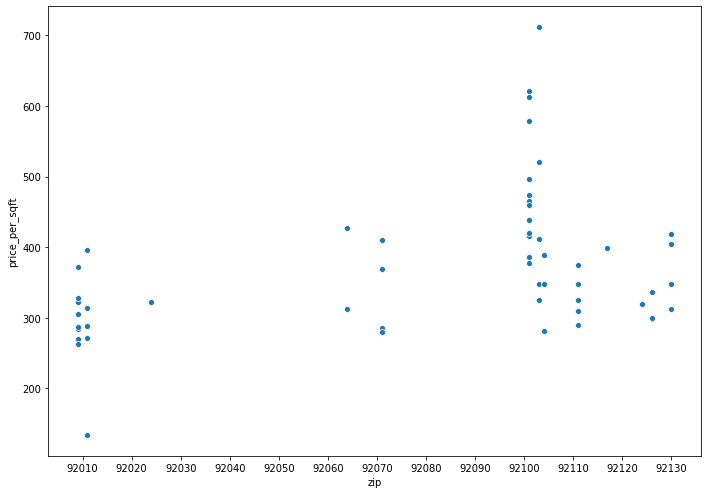

In [39]:
import matplotlib.ticker as ticker
a4_dims = (11.7, 8.27)

fig, ax = plt.subplots(figsize=a4_dims)

ax.xaxis.set_major_locator(ticker.MultipleLocator(10))

sns.scatterplot(ax=ax, x="zip", y="price_per_sqft", data=combinedDF[combinedDF.year == 2006])

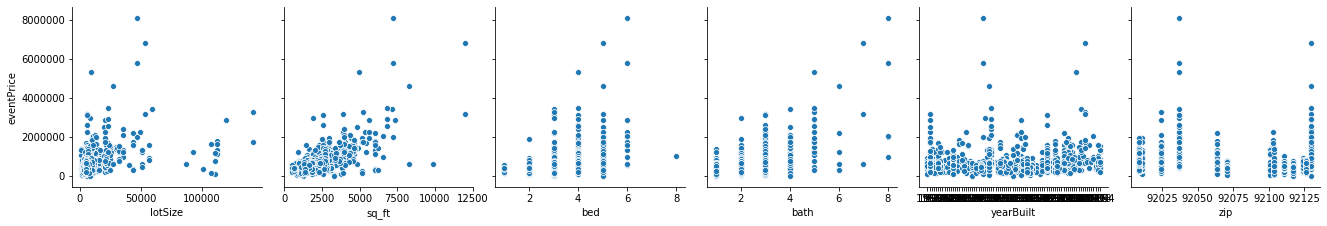

In [40]:
sns.pairplot(data=combinedDF[combinedDF.type == 0], 
             y_vars=["eventPrice"], 
             x_vars=["lotSize", "sq_ft", "bed", "bath", "yearBuilt", "zip"], 
             height = 3)

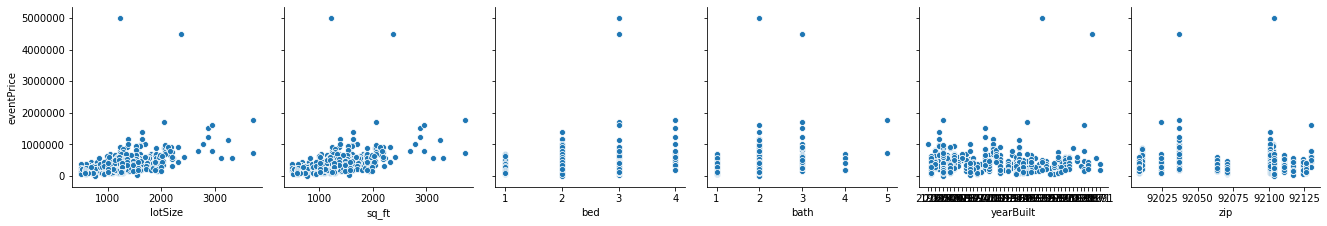

In [41]:
sns.pairplot(data=combinedDF[combinedDF.type == 1], 
             y_vars=["eventPrice"], 
             x_vars=["lotSize", "sq_ft", "bed", "bath", "yearBuilt", "zip"], 
             height = 3)

## ML Model
Make a model to predict house price in the range of data

In [42]:
combinedDF.head()

,zip,bed,bath,sq_ft,type,lotSize,yearBuilt,eventDate,eventPrice,eventTimeStamp,month,year,quarter,zipCategory,price_per_sqft
0,92103,5.0,4.0,2999.0,0,5000.0,1950,2010-11-05,854000.0,1.288915e+09,11,2010,4,8,284.761587
1,92103,5.0,4.0,2999.0,0,5000.0,1950,2003-10-14,899000.0,1.066090e+09,10,2003,4,8,299.766589
2,92103,5.0,4.0,2999.0,0,5000.0,1950,2003-04-15,764000.0,1.050365e+09,4,2003,2,8,254.751584
4,92103,2.0,2.0,1304.0,0,5131.0,1990,2014-08-21,612000.0,1.408579e+09,8,2014,3,8,469.325153
5,92103,2.0,2.0,1304.0,0,5131.0,1990,2009-03-12,450000.0,1.236816e+09,3,2009,1,8,345.092025


In [43]:
from sklearn.model_selection import train_test_split

feature_cols = ['zipCategory', 'bed', 'bath', 'sq_ft', 'type', 'lotSize', 'yearBuilt', 'eventTimeStamp']

X = combinedDF.loc[:, feature_cols]
y = combinedDF["eventPrice"]

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state = 0)

In [44]:
# Decision Tree regression
from sklearn.tree import DecisionTreeRegressor

clf = DecisionTreeRegressor(max_depth = 5)

clf.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [61]:
predictions = clf.predict(X_test)

In [62]:
score = clf.score(X_test, y_test)
score

0.48781966272867405

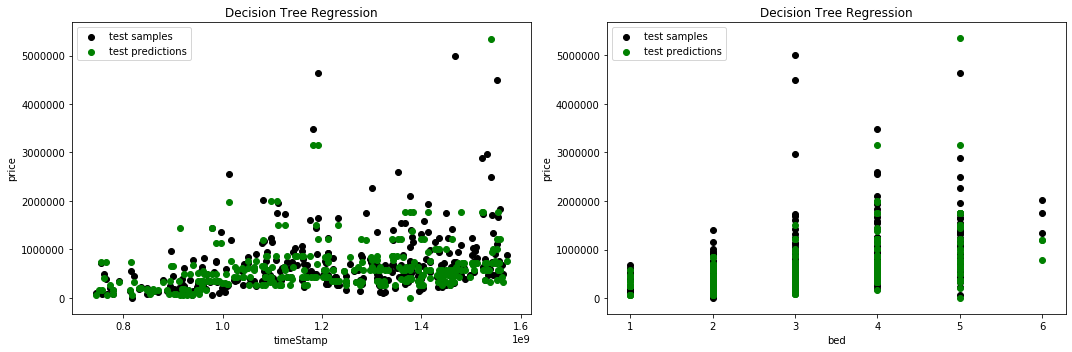

In [69]:
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(15)

plt.subplot(1, 2, 1)
plt.scatter(X_test.eventTimeStamp, y_test, c="k", label="test samples")
plt.scatter(X_test.eventTimeStamp, predictions, c="g", label="test predictions")
plt.xlabel("timeStamp")
plt.ylabel("price")
plt.title("Decision Tree Regression")
plt.legend()
plt.tight_layout()

plt.subplot(1, 2, 2)
plt.scatter(X_test.bed, y_test, c="k", label="test samples")
plt.scatter(X_test.bed, predictions, c="g", label="test predictions")
plt.xlabel("bed")
plt.ylabel("price")
plt.title("Decision Tree Regression")
plt.legend()
plt.tight_layout()


In [48]:
# Look a best depth
max_depth_range = list(range(1, 9))

# List to store the average RMSE for each value of max_depth:
accuracy = []

for depth in max_depth_range:
    
    clf = DecisionTreeRegressor(max_depth = depth, 
                                 random_state = 0, )
    clf.fit(X_train, y_train)

    score = clf.score(X_test, y_test)
    accuracy.append(score)

In [49]:
accuracy

[0.15496300119732886,
 0.29460898631671917,
 0.4080209103600021,
 0.4992815036390834,
 0.4968213569078114,
 0.47978521207702507,
 0.49815646479431863,
 0.48781966272867405]

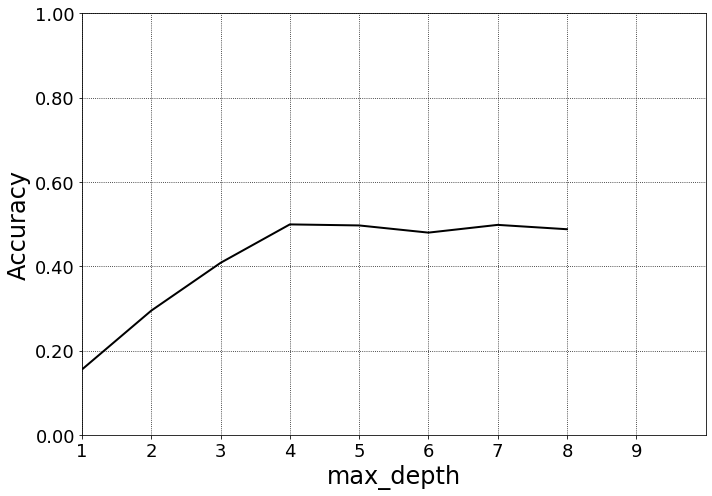

In [50]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10,7));

ax.plot(max_depth_range,
        accuracy,
        lw=2,
        color='k')

ax.set_xlim([1, 10])
ax.set_ylim([0, 1.00])
ax.grid(True,
        axis = 'both',
        zorder = 0,
        linestyle = ':',
        color = 'k')

yticks = ax.get_yticks()

y_ticklist = []
for tick in yticks:
    y_ticklist.append(str(tick).ljust(5, '0')[0:4])
ax.set_yticklabels(y_ticklist)
ax.tick_params(labelsize = 18)
ax.set_xticks([1, 2, 3, 4, 5, 6, 7, 8, 9])
ax.set_xlabel('max_depth', fontsize = 24)
ax.set_ylabel('Accuracy', fontsize = 24)
fig.tight_layout()

In [64]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 207672.2653217273
MSE: 210407424582.44937
RMSE: 458701.8907552588


## Improvements
* Could use more x data for example remodeling date, distance to ocean, or elevation might have interesting results
* More data in general. I eliminated a lot of missing data
* In order to figure out price drop and recovery, I need to analyze the data in one area more and categorize a "drop" and "recovery" 

## Make an ml model for iOS

In [51]:
# Convert to coreml model for ios use
# Requires an older <0.22 sklearn to run
import coremltools 

coreml_model = coremltools.converters.sklearn.convert(clf,
                                                      feature_cols, 
                                                      "eventPrice")

coreml_model.author = "Kevin Chen"
coreml_model.license = "MIT"
coreml_model.short_description = "Predicts house price based on various data."

W0302 12:20:16.569123 4579720640 __init__.py:74] TensorFlow version 2.0.0 detected. Last version known to be fully compatible is 1.14.0 .


ImportError: cannot import name 'Imputer' from 'sklearn.preprocessing' (/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/__init__.py)

In [56]:
coreml_model.save('House_Price_Predictor.mlmodel')